# MODEL PROJECT

## 1. Introduction

We first start in *section.3* with a classical intertemporal optimization problem in two periods. Our representative household exhibits a CRRA utility function and we want to detect how is optimazing behaviour adapts to changes in the underlying variables. In *section.4*, instead, the focus on the optimizing behaviour of our representative firm. Its production function satisfies the Inada condition  and  exhibits positive but diminishing marginal products. We come up with the optimal conditions to satisfy profit maximization. In *section.5*, we add complexity to the model making our representative consumer and firm interact under the features of the classical Ramsey model. Here, we rely on the book *Robert J.Barro and Xavier Sala-i-Martin, Economic Growth* for the main results. We come up with the phase diagram for different consumption and capital paths trying to detect the unique saddle path and steady state for the particular variables we give to the problem. Finally, *Section.6* concludes.

## 2. Import packages

In [2]:
import numpy as np
import scipy as sp
import math
from scipy import optimize
import sympy as sm
from scipy import linalg
from sympy import Derivative
from scipy import interpolate
import scipy.integrate as quad
from scipy.integrate import odeint
import scipy.special as special
from scipy.integrate import quad
from sympy import symbol,function
import ipywidgets as widgets
from IPython.display import display

#autoreload model when code is run
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

## 3. Consumer optimization problem

Before moving to the Ramsey model, we focus on consumers and their optimization problem. The standard Ramsey model assumes that the individual presents a CRRA utility function with respect to consumption of the type:  

$$u(c)=\frac{c^{1-\theta}-1}{1-\theta}$$  

where $\theta$ is a measure or relative risk aversion.
This type of preferences is really useful in the case $\theta=1$. In this occasion the CRRA utility becomes a logarithmic utility function.  
We now create a simple utility maximization problem with two periods to detect how these preferences impact the consumer optimal behavior. We take into consideration two periods, $t=0$ and $t=1$.   
Our representative consumer maximizes consumption in the present $c_0$ and in the future $c_1$ taking into consideration his labour income will be $w_0$ today and $w_1$ tomorrow. So, our utility maximization problem become:  

$$max \hspace{2pt} U(c_0,c_1) = u(c_0)+e^{-\rho}u(c_1)$$  

under the constraint:  

$$c_0+\frac{1}{1+r}{c_1} = w_0 +\frac{1}{1+r}{w_1}$$  

where $\rho$ is the subjective discount rate and r the interest rate.

Now, before solving the problem, we give some initial values:

In [3]:
#a. Defining initial parameters
theta = 0.5
w_t= 10      #present labour income
w_t1 = 10     #future labour income
rho = 0.9
r = 0.5

#a. Defining utility function
def utility(ct):
    return (ct**(1-theta)-1)/(1-theta)

#b. Defining utility function for two periods
def inter_util(c_t, c_t1):
    return utility(c_t)+np.exp(-rho)*utility(c_t1)

#c. Defining constraint
def constraint(c_t,c_t1):
    return w_t+(1/(1+r))*w_t1-c_t-(1/(1+r))*c_t1


To solve the maximization problem we firstly set the lagrangian:  

$$L=\max_{c_{0},c_{2}}\bigg(\frac{c_{0}^{1 - \theta} - 1}{1 - \theta}\bigg) + e^{-\rho}\bigg(\frac{c_{1}^{1 - \theta} - 1}{1 - \theta}\bigg) + \lambda\bigg(w_{0} + \frac{1}{1 + r}w_{1} - c_{0} - \frac{1}{1 + r}c_{1}\bigg)$$  

and we compute the first order conditions:
$$c_{0}^{-\theta} = \lambda$$
$$e^{-\rho}c_{1}^{-\theta}=\frac{1}{1 + r}\lambda$$  

The above reduces to:
$$c_{0}^{-\theta} = e^{-\rho}(1 + r)c_{1}^{-\theta}$$  

We transpose the above into code:

In [13]:
#d. Defining Euler equation
def euler(c_t,c_t1):
    return c_t**(-theta)-np.exp(-rho)*(1+r)*(c_t1)**(-theta)

#e. Creating optimization function
def optimalchoice(x):
    op = [euler(x[0], x[1])]
    op.append(constraint(x[0],x[1]))
    return op
 
#f. Applying fsolve function
ct_guess, ct1_guess = 0.5, 0.5
ct_star, ct1_star = optimize.fsolve(optimalchoice, x0=(ct_guess, ct1_guess))
utility_star = inter_util(ct_star, ct1_star)
 
#g. Printing results
print(f'The optimal consumption at the present is: {ct_star:.2f}')
print(f'The optimal consumption tomorrow is: {ct1_star:.2f}')
print(f'Utility from optimal bundle is: {utility_star:.2f}')

The optimal consumption at the present is: 13.36
The optimal consumption tomorrow is: 4.97
Utility from optimal bundle is: 6.31


We now construct an interactive plot to study the optimal behaviour of our consumer when the underlying parameters change.

In [14]:
def plot_max_problem(w_t, w_t1, theta, rho, r):

    fig1 = plt.figure(figsize=(10,10))
    ax = fig1.add_subplot(1,1,1)

    #grid of (x,y) values which we will pass to function
    x1vec = np.arange(0, 10, 40)
    x2vec = np.arange(0, 10, 40)
    ct, ct1 = np.meshgrid(x1vec, x2vec)
    uti = inter_util(x1vec, x2vec)
 
    cr=ct_star
    cr1= ct1_star
    
    # plot the budget constraint
    cons_today = np.linspace(0, 10, 40)
    ax.plot(cons_today, (1 + r) * (w_t - cons_today) + w_t1, 
           color='k')

    # demarcate the indifference curve
    CS = ax.plot(ct, ct1, uti, np.array([utility_star]), color='k', linewidth=1, linestyle='solid')
   
    # mark the optimal bundle
    ax.hlines(cr, 0, cr1, linestyle='dashed')
    ax.vlines(cr1, 0, cr, linestyle='dashed')

    # axes, labels, title, colorbar 
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 15)
    ax.set_xlabel(r'Present Consumption, $C_{t}$', fontsize=12)
    ax.set_ylabel(r'Future Consumption, $C_{t+1}$', fontsize=12)
    ax.set_title(r'Optimal bundle for CRRA utility', fontsize=20, pad=15)
    plt.show()

def plot_time():
    widgets.interact(plot_max_problem,
    w_t= widgets.IntSlider(
           description='$w_{t}$',
           min=0,
           max=10,
           step=1,
           value=5,
           continuous_update=False,
    ),
    
    w_t1 = widgets.IntSlider(
            description="$w_{t+1}$",
            min=0,
            max=10,
            step=1,
            value=5,
            continuous_update=False,
    ),
    theta = widgets.FloatSlider(
            description="$\\theta$",
            min=0.5,
            max=0.9,
            step=0.02,
            value=0.5,
            continuous_update=False,
    ),
    rho = widgets.FloatSlider(
            description="$\\rho$",
            min=0.9,
            max=0.99,
            step=0.01,
            value=0.9,
            continuous_update=False,
    ),
    r = widgets.FloatSlider(
            description="$r$",
            min=0.01,
            max=0.1,
            step=0.005,
            value=0.03,
            continuous_update=False,
    ),
);  
    

In [15]:
plot_time()

interactive(children=(IntSlider(value=5, continuous_update=False, description='$w_{t}$', max=10), IntSlider(va…

In [16]:

def plot_max_problem(w_t, w_t1, theta, rho):

    fig1 = plt.figure(dpi=150)
    ax = fig1.add_subplot(1,1,1)

    #grid of (x,y) values which we will pass to function
    ct_range = np.linspace(0, 10, 100)
    ct1_range = np.linspace(0, 10, 100)
    c_t, c_t1 = np.meshgrid(ct_range, ct1_range)
    
    # we will actually plot utility
    uti = inter_util(c_t, c_t1)
    
    cr=ct_star
    cr1= ct1_star
    
    # plot the budget constraint
    cons_today = np.linspace(0, 10, 100)
    ax.plot(cons_today, (1 + r) * (w_t - cons_today) + w_t1, 
           color='r')

    # demarcate the indifference curve
    CS = ax.plot(cr, cr1, uti, np.array([utility_star]), colors='k', linewidths=1, linestyles='solid')
    ax.clabel(CS, inline=1, fmt='%1.4f')
    ax.plot()
    # mark the optimal bundle
    ax.hlines(ct_star, 0, ct1_star, linestyle='dashed')
    ax.vlines(ct1_star, 0, ct_star, linestyle='dashed')

    # axes, labels, title, colorbar 
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xlabel(r'Present Consumption, $C_{t}$', fontsize=10)
    ax.set_ylabel(r'Future Consumption, $C_{t+1}$', fontsize=10)
    ax.set_title(r'Optimal bundle for CRRA utility', fontsize=15)
    plt.show()

def plot_time():
    widgets.interact(plot_max_problem,
    w_t= widgets.FloatSlider(
           description='$w_{t}$',
           min=0,
           max=10,
           step=1,
           value=5,
           continuous_update=False,
    ),
    
    w_t1 = widgets.FloatSlider(
            description="$w_{t+1}$",
            min=0,
            max=10,
            step=1,
            value=5,
            continuous_update=False,
    ),
    theta = widgets.FloatSlider(
            description="$\\theta$",
            min=0.5,
            max=0.9,
            step=0.02,
            value=0.5,
            continuous_update=False,
    ),
    rho = widgets.FloatSlider(
            description="$\\rho$",
            min=0.9,
            max=0.99,
            step=0.01,
            value=0.9,
            continuous_update=False,
    ),
);  
    

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='$w_{t}$', max=10.0, step=1.…

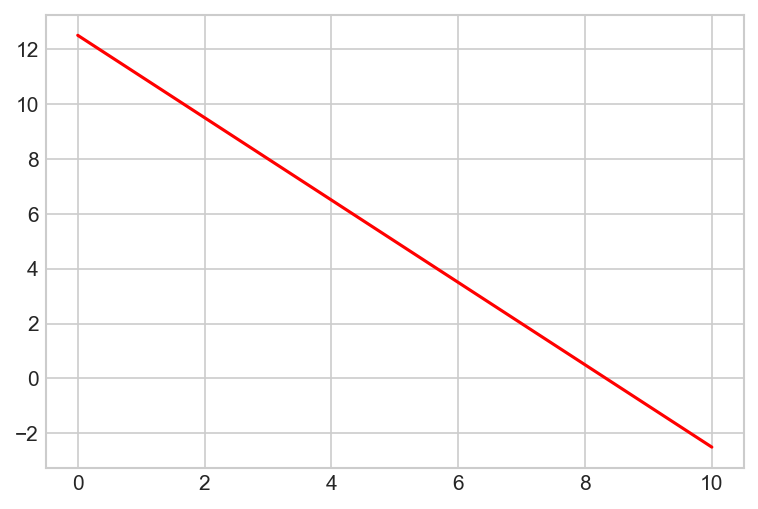

## 4. Firm optimization problem 

In the Ramsey model the represenatative firm has a production function that satisfies the neoclassical properties of constant return to scale in $K$ (capital) and $L$ (Labour) and each input exhibits positive but diminishing marginal product. We will deal with quantities per unit of effective labor. So the production function will be written in intensive form:
$\hat{y}=f(\hat{k})$ where $\hat{y}=\frac{Y}{LT}$, $\hat{k}=\frac{K}{LT}$ and T is the technology.

Specifically, we are going to assume the following production function:  

$$\hat{y}=f(\hat{k})=k^{\alpha}$$  

where $\alpha$ is the capital share of output and $k$ is capital per effective labour. 
From now on, for simplicity, we assume that technology will increase at the rate $x=0$.
We now check that in this case the marginal product of capital are diminishing ($f''< 0$) and that the Inada conditions are satisfied.

In [21]:
#a. Transposing into symbols
sm.init_printing(use_unicode=True) # for pretty printing        
alpha = sm.symbols('alpha')        # capital share
k = sm.symbols('k')                 # capital per effective worker               
W = sm.symbols('W')                # wage
l = sm.symbols('l')
T = sm.symbols('T')
delta = sm.symbols('delta')
r = sm.symbols('r')
w = sm.symbols('w')
L = sm.symbols('L')

The production function is:


The profit function is:


The first derivative with respect to k is:


The second derivative with respect to k is:


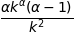

First Inada condition is:


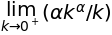

Second Inada condition is:


NameError: name 'K' is not defined

In [22]:
#b. Defining production function
prod = k**alpha
print(f'The production function is:')
display(prod)

#c. Defining profit function
profit = prod - (r+delta)*k -w*L
print(f'The profit function is:')
display(profit)

#d. Calculating first and second derivatives with respect to k
print(f'The first derivative with respect to k is:')
sol = sm.diff(prod,k)
display(sol)
print(f'The second derivative with respect to k is:')
sol1 = sm.diff(prod,k, k)
display(sol1)

#e. Check Inada conditions
print(f'First Inada condition is:')
inada1 = sm.Limit(sol,k,0)
display(inada1)
print(f'Second Inada condition is:')
inada2 = sm.Limit(sol,K, sm.oo)
display(inada2)


In [23]:
#f. Profit maximization with respect to capital per effective worker
print(f'Optimazing the profit with respect to k, we obtain:')
profitk = sm.Eq(sm.diff(profit,k))
display(profitk)
print(f'And the optimal k is:')
profitk1 = sm.solve(profitk,k)
display(profitk1)

Optimazing the profit with respect to k, we obtain:


And the optimal k is:


In [24]:
#d. Profit maximization with respect to labour per effective worker
print(f'Optimazing the profit with respect to w, we obtain:')
profitl = sm.Eq(sm.diff(profit,l))
display(profitl)
print(f'And the optimal l is:')
profitl1 = sm.solve(profitl,l)
display(profitl1)

Optimazing the profit with respect to w, we obtain:


True

And the optimal l is:


In [25]:
a = (K/(L))**alpha-(K/(L))*(r+delta)-w*(K/(L))
display(a)
a1 = sm.diff(a,l)
display(a1)
b = sm.solve(a1,l)
display(b)
sm.simplify(b)

NameError: name 'K' is not defined

## 5. Ramsey Model

We make now our representative consumer and firm interacting with each other under the classical framework of the Ramsey model. Our optimizing household of *section.2* mantains the same CRRA utility function with respect to consumption. The new element is that he maximizes over an infinite horizon taking into account the welfare and resources of his prospective descendants. He expects the size of his future family to grow at the rate $n$, given as exogenous and constant. We normalize the size of the family at time $t= \small{0}$ to 1, so that at the generic time $t$, the size of the family will be $L(t)=e^{nt}$. The utility maximization problem become:
 
$$U= \int_{0}^{\infty} e^{-(\rho-n)t}\left[\frac{c^{1-\theta}-1}{1-\theta}\right]dt$$

The household holds assets ($a(t)$) which pay rate of return $r(t)$ and supplies inelastically one unit of labor services for the wage rate $w(t)$. We assume a closed economy so that no assets can be traded internationally and we assume a competitive market so that the interest rate, r $r(t)$, and the wage rate $w(t)$ are given.                              
The total income received by the aggregate is the sum of labor income, $w(t)·L(t)$, and asset income, $r (t)·(Assets)$ and the income that it is not consumed, it is used to accumulate more assets:  

$$\frac{d(Assets)}{dt} = r(Assets)+wL-C$$  

In per-capita terms, the household budget constraint becomes:  

$$\dot{\alpha} = (r-n)\alpha+w-c$$

We assume that the credit market imposes a constraint on the amount of borrowing to rule out chain-letter possibilities. The appropriate restriction turns out to be that the present value
of assets must be asymptotically non-negative:  

$$\lim_{t \to \infty} \bigg\{ \alpha(t)*exp\left[-\int_{0}^{t}[r(v)-n]dv \right] \bigg\} = 0$$

Our representative firm maintains the same characteristics depicted in *Section.4*. As before, initial technology is normalized to 1  and for simplicity we assume that it grows at rate $x=0$.   
One unit of output can be used to generate one unit of household consumption or one unit of additional capital. Therefore, as long as the economy is not at a corner solution in which all current output goes into consumption or new capital, the price of k in terms of c will be fixed at unity. Because consumption will be nonzero in equilibrium, we have to be concerned only with the possibility that none of the output goes into new capital.

We briefly derive the fundamental equations of the model (for more analytical derivations have a look in *Barro & Martin, Chapter 2* and relative appendix).  
Since the economy is closed, the assets per adult person, $a$, equal the capital per worker, $k$. Given the consumer budget constraint, the optimizing conditions for $r$ and $w$ found in the *Section.4* and $a=k$, we get the resource constraint for the economy which determines the evolution for capital per effective labour:

$$\dot{\hat{k}} = \hat{k}^{\alpha} - \hat{c} -(x+n+\delta)\hat{k} \hspace{7pt}(1)$$

The differential equation that determines the evolution of the consumption per effective labour is instead:

$$\frac{\hat{c}}{c}-x=\frac{1}{\theta} \big[\alpha \hat{k}^{\alpha-1} -\delta -\rho-\theta x \big] \hspace{7pt}(2)$$

The transversality condition becomes:  

$$\lim_{t \to \infty} \bigg\{ \hat{k}*exp\left[-\int_{0}^{t}[\alpha \hat{k}^{\alpha-1} -\delta - n - x]dv \right] \bigg\} = 0$$

The steady state values for c and k are determined by setting the expression (1) and (2) to zero. The $\dot{k}=0$, locus is determined by:

$$\hat{c}= \hat{k}^{\alpha}-(x+n+\delta)\hat{k}$$

Equation (2) implies that the $\dot{c}=0$ locus is satisfied when:

$$\alpha \hat{k}^{\alpha-1}=\delta +\rho+\theta x$$

The determination of the steady state occurs at the intersection of the vertical line for $\dot{c}=0$ and the solid curve for $\dot{k}=0$ and the two equations for the steady state quantities are:

$$ \hat{k}^{*}=\big(\frac{\delta+\rho+ x\theta}{\alpha}\big)^{\frac{1}{\alpha-1}}$$

$$ \hat{c}^{*}=(k^{*})^{\alpha}-(n+\delta+x)k^{*}$$

The steady-state value for the production per effective labour becomes $\hat{y}^{*}=(\hat{k}^{*})^{\alpha}$ and the transversality condition implies that $\rho>n+(1-\theta)x$. If $\rho$ not satisfies this condition, the household's optimization problem is not well posed and infinite utility can be attained if consumption grew at the rate $x$.

We now start to code the main equation for the model and we find the steady-state values for consumption, capital and production for our given values of $\theta$, $\rho$, $n$, $\delta$, $\alpha$ and $x$.


In [49]:
#a. Parameter values 

theta = 3.0          # measure of relative risk aversion
rho = 0.01           # subjective discount rate
n = 0.0025           # family growth rate
delta = 0.3          # depreciation rate of capital          
alpha = 0.3          # capital share rate
g=0                  # technomogy growth rate

#b. Transversality condition must be satisfied
print(f'Is the transversality condition satisfied?')
def transversality():
    if  rho > n + (1 - theta)*g:
        print(f'Yes, it is satisfied.')
    else:
        print(f'No, it is not satisfied.')

transversality()

Is the transversality condition satisfied?
Yes, it is satisfied.


In [39]:
#c. Defining production function
def prod(k_t):
    return k_t**alpha

#d. Defining the consumption function
def cons_t1(c_t, k_t):
    return (np.exp(-rho) * (np.exp(-delta) + alpha * cap_t1(c_t, k_t)**(alpha - 1)))**(1 / theta) * c_t

#e. Defining the capital equation
def cap_t1(c_t,k_t):
    return np.exp(-n)*(prod(k_t)+np.exp(-delta)*k_t-c_t)

#f. Difference between capital in two periods
def capt_cap1(c_t, k_t):
    return cap_t1(c_t, k_t) - k_t

#g. Difference between consumption in two periods
def const_const1(c_t, k_t):
    return cons_t1(c_t, k_t) - c_t

In [52]:
#h. Steady state capital
def k_star():
    return ((delta+rho)/alpha)**(1 / (alpha - 1))

#i. Steady state consumption
def c_star():
    return prod(k_star())-(delta+n)*k_star()

#j Steady state production
def y_star():
    return (k_star())**alpha

#k. Values of steady state capital and consumption for our chosen variables
print(f'The steady state capital per effective labour is: {k_star():.2f}')
print(f'The steady state consumption per effective labour is: {c_star():.2f}')
print(f'The steady state production per effective labour is: {y_star():.2f}')

The steady state capital per effective labour is: 0.95
The steady state consumption per effective labour is: 0.70
The steady state production per effective labour is: 0.99


### 5.2 Generical Phase Diagram

The Ramsey model is interesting for its predictions about the path of capital and consumption growth given an initial condition $k(0)$. We now want to plot the generic phase diagram showing the nature of this dynamics 

In [54]:
#a. locus for capital
def locus_cap(k_t):
    return prod(k_t) - k_t*(delta + n)

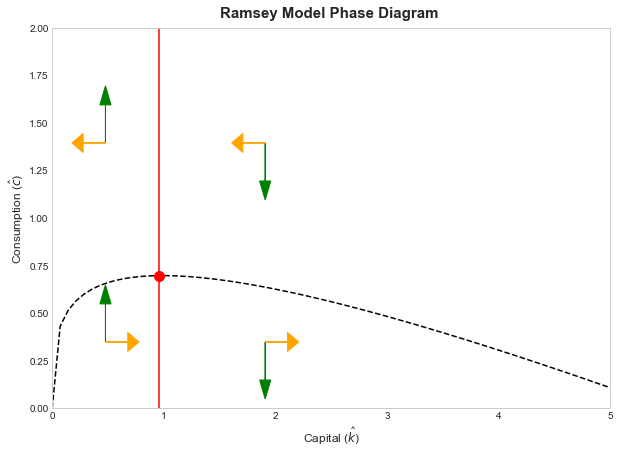

In [58]:
#b. Create a grid of points for plotting
x_vec = np.linspace(0, 500, 7000)

#c. Constructing the generic phase diagram 
phase = plt.figure(figsize=(10,7))
plt.xlim(0,5)
plt.ylim(0,2)
plt.grid(False)
plt.xlabel([])

#c.1 Adding the capital and consumption locii
plt.plot(x_vec, locus_cap(x_vec), linestyle ='--', color='black') 
plt.axvline(k_star(), linestyle = '-', color = 'red')
plt.plot(k_star(), c_star(), marker='o', markersize = 10, color ='red')

#c.2 Adding arrows to indicate dynamics 
plt.arrow((1/2)*k_star(), (1/2)*c_star(), dx=0, dy=0.2, head_width = 0.1, head_length= 0.1, color = 'green')
plt.arrow((1/2)*k_star(), (1/2)*c_star(), dx=0.2, dy=0, head_width = 0.1, head_length= 0.1, color = 'orange')
plt.arrow((1/2)*k_star(), 2*c_star(), dx=0, dy=0.2, head_width = 0.1, head_length= 0.1, color = 'green')
plt.arrow((1/2)*k_star(), 2*c_star(), dx=-0.2, dy=0, head_width = 0.1, head_length= 0.1, color = 'orange')

plt.arrow(2*k_star(), (1/2)*c_star(), dx=0, dy=-0.2, head_width = 0.1, head_length = 0.1, color = 'green')
plt.arrow(2*k_star(), (1/2)*c_star(), dx=0.2, dy=0, head_width = 0.1, head_length = 0.1, color = 'orange')
plt.arrow(2*k_star(), 2*c_star(), dx=0, dy=-0.2, head_width = 0.1, head_length = 0.1, color = 'green')
plt.arrow(2*k_star(), 2*c_star(), dx=-0.2, dy=0, head_width = 0.1, head_length = 0.1, color = 'orange')

#c.3 Adding axis labels and title
plt.xlabel('Capital ($\hat{k}$)', fontsize = 12)
plt.ylabel('Consumption ($\hat{c}$)', fontsize = 12)
plt.title('Ramsey Model Phase Diagram ', fontsize=15, weight='bold', pad = 10)
plt.show()

The dashed black line represents the $\dot{k}=0$ loci and red line the $\dot{c}=0$ loci (the other loci where $\dot{c}=0$ corresponds the the horizontal axis $\hat{c}=0$). The red dot displays, instead, the steady state.
The arrows depict the nature of the dinamics for consumption and capital. So, consumption rises for value of capital $\hat{k}<k^{*}$ (green arrows point upwards) and decreases otherwise (green arrown point downwards). Capital, instead, falls for values of consumption above the dashed loci (yellow arrows point leftwards) and rises for values below (yellow arrows point rightwards).

### 5.3 Plotting different  paths

In the previous subsection we got an overall idea of the dinamics of the systems. Now, we are going to plot the consumption/capital paths for different initial values of consumption. We will see that only one precise value of $c(0)$ will lead us to the the steady state and this path is called the saddle path.

In [ ]:
# Simulating deterministic Ak model 

St_dict = {'k_star': k_star(), 'c_star': c_star()}
        
# Update variables
def update():
    c_t = cons_t1(c_t1, k_t1)
    k_t = cap_t1(c_t1, k_t1)

# Create paths of length n starting from current state variables
def s_path( n=None):
    
    tra = np.zeros(shape=(n,2))
            
    for t in range (n):
        tra[t,0]=k_t
        tra[t,1]=c_t
        update()
            
        return tra

# Find steady state thorugh optimization
def steadystate(k0=None, c0=None):
            
    def SS(X):
        res=[cap_t1(X[0],X[1]-X[0])]
        res.append(cons_t1(X[0],X[1]-X[1]))
        return res
        
    return optimize.fsolve(SS, x0=(c0,k0))


# Compute saddle_path
def optimal_path(k0=None, c0=None, tol=1.5e-08):
       
        # compute steady state values
        c_star, k_star = St_dict['c_star'], St_dict['k_star']
        
        if k0 <= k_star:
            c_l = 0
            c_h = c_star
        else:
            c_l = c_star
            c_h = k0**alpha
        c0 = (c_h + c_l) / 2
        c_t, k_t = c0, k0
    
        #Initialize algorith 
        cal  = 0
        n_iter = 0
        
        # Algorithm
        while 1:
            update()
            dist = np.abs(((c_t - c_star)**2 + (k_t - k_star)**2)**(1/2))
            cal = cal + 1
            if k0 <= k_star:
                if k_t > k_star:
                    if dist < tol:
                        break
                    else: 
                        c_low = c0
                        c0 = (c_high + c_low) / 2
                        c_t, k_t = c0, k0
                        cal = 0
                if c_t > c_star:
                    if dist < tol:
                        break
                    else: 
                        c_high = c0 
                        c0 = (c_high + c_low) / 2
                        c_t, k_t = c0, k0
                        cal = 0
            else:
                if k_t < k_star:
                    if dist < tol:
                        break
                    else: 
                        c_high = c0 
                        c0 = (c_high + c_low) / 2
                        c_t, k_t = c0, k0
                        cal = 0
                if c_t < c_star:
                    if dist < tol:
                        break
                    else: 
                        c_low = c0
                        c0 = (c_high + c_low) / 2
                        c_t, k_t = c0, k0
                        cal = 0
                
        c_t, k_t = c0, k0
        result = s_path(cal)

        return [c_t, result, s_path, dist]
        
# Saddle path
solution = optimal_path(k0, tol=1.4e-7)

In [ ]:
# Set initial levels for c,k
c_t1, k_t1 = 0.4, 12

# Generate a sample path of length 10 for the Ramsey economy 
s_path(10)

cap_t1(0.4, 12), cons_t1(0.4, 12)


In [1]:
# Grid of points for plotting
x1_vec = np.linspace(0, 500, 7000)

#initial level of capital
k0 = 0.5 * St_dict['k_star']

# Create an array of initial conditions for choices of consumption per effective worker
initial_consumption = np.linspace(0.5 * St_dict['c_star'], 1.5 * St_dict['c_star'], num=5)

# Create a new plot
plt.figure(figsize=(10,7))
plt.xlim(0,7)
plt.ylim(0,2)

# Add the consumption and capital 
plt.plot(x1_vec, locus_cap(x1_vec), linestyle ='--', color='black', label=r'$c=(A-\delta-n)k$')
plt.axvline(St_dict['k_star'], color='black')
plt.plot(St_dict['k_star'], St_dict['c_star'], marker='o', markersize=7, color='red')
# saddle-path
plt.plot(solution[1][:, 0], solution[1][:, 1], color='red')

# initial level of capital per worker
plt.axvline(k0, color='green', ls='--')

# FOR loop plots a sample path for each initial value of c
for c_t in initial_consumption:
    c_t, k_t = c_t, k0
    trpath = s_path(1000) 
    plt.plot(trpath[:, 0], trpath[:, 1])

# Add title and axis labels
plt.xlabel('Capital (k)', fontsize = 12)
plt.ylabel('Consumption (c)', fontsize = 12)
plt.title('Ramsey Model Phase Diagram ', fontsize=15, weight='bold', pad = 10)
plt.show()

NameError: name 'np' is not defined

## 6. Conclusion

the interception between two loci by using Euler and capital equation (they combined characterize the motion of both consumption and capital) is the steady state. Therefor, we can use the equations to draw the phase diagram and characterized the dynamics of the economy and phase diagram. The figur shows the dynamics of consumption and capital for diffrent initial values of consumption and given initial capital- including saddle path. The saddle path is the a sequence of different initial values of consumption as a function of capital that leads to stedy state. In other words it is the combinations of consumption and capital that leads the economy to steady state.
This is why we used TVC it ensures that we end up on the saddle path and it rules out all the non-optimal solution